In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cbrain.imports import *
from cbrain.model_diagnostics import *

Using TensorFlow backend.


In [3]:
model_dir = '/export/home/srasp/repositories/CBRAIN-Keras-Diagnostics/saved_models/'
model_path = model_dir + 'B001_purecrm_ess_sample1_base.h5'

In [4]:
pre_dir = '/scratch/srasp/preprocessed_data/'

In [7]:
def get_stats(model_name, option='purecrm', data_str='', norms=(None, None, None, None)):
    model_path = model_dir + model_name + '.h5'
    diag = ModelDiagnostics(
        model_path, 
        pre_dir + f'{option}_ess{data_str}_valid_sample1_features.nc',
        pre_dir + f'{option}_ess{data_str}_valid_sample1_targets.nc',
        pre_dir + f'{option}_ess{data_str}_train_sample1_norm.nc',
        *norms
    )
    diag.compute_stats(compute_SPDT_SPDQ=True if option == 'purecrm' else False)
    print(diag.mean_stats())
    return diag

In [6]:
diag = ModelDiagnostics(
    model_path, 
    pre_dir + 'purecrm_ess_valid_sample1_features.nc',
    pre_dir + 'purecrm_ess_valid_sample1_targets.nc',
    pre_dir + 'purecrm_ess_train_sample1_norm.nc'
)

In [17]:
diag.compute_stats(compute_SPDT_SPDQ=True)

  0%|          | 1/2868 [00:00<05:11,  9.20it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:35<00:00, 13.28it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 239.035288736


In [19]:
diag.mean_stats()

../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


,bias,mse,pred_var,true_var,expl_var_cut9
SPDQ,7.00779e-10,1.32574e-15,8.70507e-16,2.25854e-15,0.256709
SPDT,-8.98443e-07,1.1248e-09,1.05161e-09,2.22517e-09,0.407909
QRL,1.21491e-06,2.15997e-10,8.75047e-11,3.13624e-10,0.332738
QRS,-3.67374e-07,2.79665e-11,1.55369e-10,1.9229e-10,0.665941
all,-1.25518e-08,3.42191e-10,3.23621e-10,6.82771e-10,0.415824


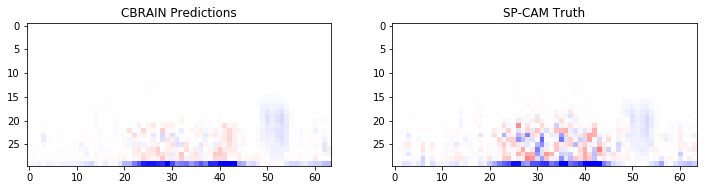

In [21]:
diag.plot_double_lat_lev_slice('SPDQ', 1, 0, vmin=-5e-7, vmax=5e-7, cmap='bwr')

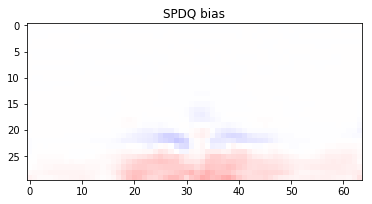

In [22]:
diag.plot_stat_lat_lev_mean('bias', 'SPDQ', vmin=-5e-8, vmax=5e-8, cmap='bwr')

In [ ]:
get_purecrm_stats('B002_purecrm_ess_sample1_deep1')

In [25]:
get_purecrm_stats('B003_purecrm_ess_sample1_tanh')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:47<00:00, 12.62it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 267.624974687
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  7.23547e-10  1.36536e-15  8.32953e-16  2.25854e-15      0.471466
SPDT -9.62342e-07  1.14744e-09  1.00434e-09  2.22517e-09       0.40612
QRL   1.37961e-06  2.31197e-10  6.15432e-11  3.13624e-10      0.331528
QRS  -4.51383e-07   3.1669e-11  1.50245e-10   1.9229e-10      0.627723
all  -8.34887e-09  3.52578e-10  3.04032e-10  6.82771e-10      0.459209


In [26]:
get_purecrm_stats('B004_purecrm_ess_sample1_mse')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:29<00:00, 13.72it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 32.1739559174
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.44042e-11  1.19718e-15  1.07258e-15  2.25854e-15      0.512979
SPDT  1.21352e-08  9.37052e-10  1.31008e-09  2.22517e-09      0.552854
QRL   -6.9258e-09  1.17334e-10  2.06188e-10  3.13624e-10       0.60863
QRS  -9.03553e-09  2.08555e-11  1.73175e-10   1.9229e-10      0.760162
all   -9.6014e-10  2.68811e-10   4.2236e-10  6.82771e-10      0.608656


In [8]:
get_stats('B005_purecrm_ess_sample1_lr1', 'purecrm')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [04:22<00:00, 10.92it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 562.596083411
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  5.33742e-10  1.50669e-15  7.46111e-16  2.25854e-15      -9.08153
SPDT -9.57086e-07  1.27034e-09  9.25632e-10  2.22517e-09      0.357174
QRL   1.63533e-06  2.76137e-10  4.46853e-11  3.13624e-10      0.143316
QRS  -8.34128e-07  5.28353e-11  1.51219e-10   1.9229e-10      0.435124
all  -3.88375e-08  3.99829e-10  2.80384e-10  6.82771e-10      -2.03648


In [9]:
get_stats('B006_purecrm_ess_sample1_deep1_tanh', 'purecrm')

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [05:00<00:00,  9.54it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 259.272209473
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  6.52305e-10  1.27906e-15  9.09679e-16  2.25854e-15      0.498797
SPDT -8.70314e-07  1.05302e-09  1.07841e-09  2.22517e-09      0.438019
QRL   1.11861e-06  1.95686e-10  1.03737e-10  3.13624e-10      0.403785
QRS  -3.74977e-07    2.789e-11  1.54035e-10   1.9229e-10      0.669903
all  -3.15076e-08   3.1915e-10  3.34046e-10  6.82771e-10      0.502626


In [6]:
get_stats('B007_purecrm_ess_sample1_bs128', 'purecrm')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:30<00:00, 19.08it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 362.400219221
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  6.86639e-10  1.42751e-15  8.05503e-16  2.25854e-15      -13.5649
SPDT -1.06196e-06  1.23121e-09  1.01771e-09  2.22517e-09      0.363882
QRL   1.68577e-06  2.89164e-10  5.46203e-11  3.13624e-10      0.112509
QRS  -5.26512e-07  4.18396e-11  1.49506e-10   1.9229e-10      0.494826
all   2.44957e-08  3.90554e-10   3.0546e-10  6.82771e-10      -3.14841


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [7]:
get_stats('B011_purecrm_ess_sample1_deep2', 'purecrm')

  0%|          | 2/2868 [00:00<03:11, 14.96it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:56<00:00, 12.14it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 18.1285692931
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.88507e-11  1.10337e-15  1.16983e-15  2.25854e-15       0.51306
SPDT  1.91803e-08  8.49573e-10   1.3861e-09  2.22517e-09      0.500514
QRL   5.12045e-09   1.0106e-10  2.16129e-10  3.13624e-10      0.561471
QRS  -7.33987e-09  2.15852e-11  1.70898e-10   1.9229e-10      0.749456
all    4.2355e-09  2.43055e-10  4.43281e-10  6.82771e-10      0.581125


In [9]:
get_stats('B012_purecrm_ess_sample1_wide1', 'purecrm')

  0%|          | 1/2868 [00:00<06:18,  7.57it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:25<00:00, 19.68it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 26.9128463325
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  1.41277e-11  1.24766e-15  1.00916e-15  2.25854e-15      0.512866
SPDT -2.17576e-08  1.02993e-09  1.18876e-09  2.22517e-09      0.487355
QRL   1.87796e-08  1.74963e-10   1.3535e-10  3.13624e-10      0.465434
QRS   -5.4457e-09  2.65039e-11  1.66302e-10   1.9229e-10      0.698366
all  -2.10239e-09  3.07849e-10  3.72603e-10  6.82771e-10      0.541005


In [7]:
get_stats('B013_purecrm_ess_sample1_mse_var', 'purecrm')

  0%|          | 1/2868 [00:00<08:06,  5.89it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:23<00:00, 19.95it/s]

Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 53.1493661237
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  -1.6666e-10  1.20159e-15  1.15124e-15  2.25854e-15      0.471388
SPDT  3.23739e-07  9.38556e-10  1.40732e-09  2.22517e-09      0.550967
QRL  -4.05483e-07   1.1894e-10  2.20937e-10  3.13624e-10      0.598929
QRS   4.45904e-07  2.08895e-11  1.86979e-10   1.9229e-10      0.763699
all   9.09984e-08  2.69597e-10   4.5381e-10  6.82771e-10      0.596246



../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [7]:
get_stats('B015_purecrm_ess_sample1_impr', 'purecrm')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:07<00:00, 15.27it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 34.5586245003
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.94226e-11  1.09648e-15  1.18147e-15  2.25854e-15      0.538316
SPDT  1.93201e-08  8.15725e-10   1.4278e-09  2.22517e-09      0.572192
QRL   1.51416e-09  8.35849e-11  2.34131e-10  3.13624e-10      0.671833
QRS  -3.30423e-09  1.21258e-11  1.80681e-10   1.9229e-10      0.857204
all   4.37764e-09  2.27859e-10  4.60654e-10  6.82771e-10      0.659886


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [8]:
get_stats('B016_purecrm_ess_sample1_impr_var', 'purecrm')

  0%|          | 1/2868 [00:00<06:11,  7.72it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:35<00:00, 18.45it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 52.973361563
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.52658e-10  1.10026e-15   1.2599e-15  2.25854e-15       0.50152
SPDT  3.00419e-07  8.18069e-10  1.52172e-09  2.22517e-09       0.57096
QRL  -3.52449e-07  8.44141e-11  2.48644e-10  3.13624e-10      0.668771
QRS   4.00931e-07  1.26019e-11   1.9234e-10   1.9229e-10      0.854808
all   8.71872e-08  2.28771e-10  4.90676e-10  6.82771e-10      0.649015


In [10]:
get_stats('B014_purecrm_essv2_sample1_base', 'purecrm')

  0%|          | 1/2868 [00:00<06:17,  7.59it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:06<00:00, 22.74it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 32.9083586908
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  4.18814e-11  1.19982e-15  1.07231e-15  2.25854e-15      0.493179
SPDT -1.19131e-07  9.40018e-10  1.31018e-09  2.22517e-09      0.553984
QRL   5.76843e-09  1.18709e-10  2.03306e-10  3.13624e-10      0.601227
QRS  -5.85358e-09  2.20564e-11   1.7163e-10   1.9229e-10      0.745109
all  -2.97935e-08  2.70196e-10  4.21278e-10  6.82771e-10      0.598375


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [14]:
d = get_stats('B017_purecrm_essv2_norm-by-var_sample1_base', 'purecrm', 'v2_norm-by-var')

  0%|          | 2/2868 [00:00<03:02, 15.72it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [01:59<00:00, 24.01it/s]


Mean squared energy violation. True: 73.567998927
Mean squared energy violation. Pred: 29.9443350001
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  7.21582e-12  1.19756e-15  1.02762e-15  2.23206e-15      0.518451
SPDT  6.27665e-09   9.2792e-10  1.27283e-09  2.20551e-09      0.560351
QRL  -1.78392e-08  1.10434e-10  1.87919e-10  2.95295e-10      0.617147
QRS  -4.74111e-09  1.88736e-11  1.70939e-10  1.89631e-10      0.775589
all  -4.07411e-09  2.64307e-10  4.07922e-10  6.72609e-10      0.617884


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


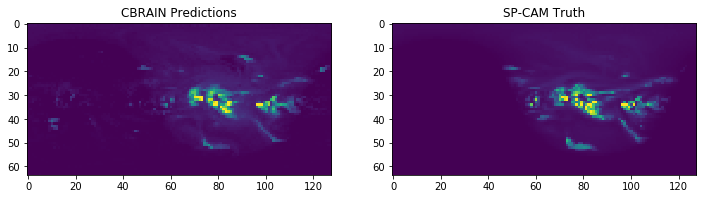

In [18]:
d.plot_double_lat_lon_slice('QRS', 40, 12, vmin=0, vmax=0.0001)

In [24]:
diag = ModelDiagnostics(
    model_dir + 'B019_purecrm_essv2_noadiab_sample1_max_rs.h5', 
    pre_dir + 'purecrm_essv2_noadiab_valid_sample1_features.nc',
    pre_dir + 'purecrm_essv2_noadiab_valid_sample1_targets.nc',
    pre_dir + 'purecrm_essv2_noadiab_train_sample1_norm.nc',
    fsub='feature_means', fdiv='max_rs', tmult='target_conv'
)

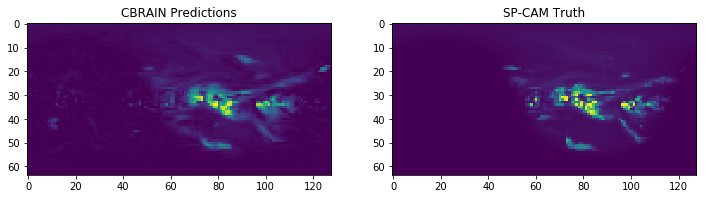

In [25]:
diag.plot_double_lat_lon_slice('QRS', 40, 12, vmin=0, vmax=0.0001)

In [5]:
norms = ('feature_means', 'max_rs', None, 'target_conv')

In [14]:
d = get_stats('B018_purecrm_essv2_nonorm_sample1_max_rs', 'purecrm', 'v2_nonorm', norms)

  0%|          | 1/2868 [00:00<04:56,  9.67it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:12<00:00, 21.59it/s]


Mean squared energy violation. True: 811.318743712
Mean squared energy violation. Pred: 737.415635916
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  4.01283e-11  1.20451e-15  1.01277e-15  2.23206e-15       0.52495
SPDT -9.32125e-08  9.26142e-10   1.2665e-09  2.20551e-09      0.543355
QRL   3.55019e-09  1.15217e-10  1.79859e-10  2.95295e-10      0.625118
QRS  -3.33058e-09   1.9771e-11  1.70309e-10  1.89631e-10      0.765219
all  -2.32382e-08  2.65283e-10  4.04168e-10  6.72609e-10       0.61466


/data11/home/srasp/repositories/CBRAIN-Keras-Diagnostics/notebooks/presentation/cbrain/model_diagnostics.py:238: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [8]:
d = get_stats('B019_purecrm_essv2_noadiab_sample1_max_rs', 'purecrm', 'v2_noadiab', norms)

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 94; targets have shape 120


  2%|▏         | 66/2868 [00:05<03:52, 12.03it/s]


KeyboardInterrupt: 

In [10]:
d = get_stats('B020_purecrm_essv2_nonorm_sample1_noise1', 'purecrm', 'v2_nonorm', norms)

  0%|          | 2/2868 [00:00<02:53, 16.56it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:26<00:00, 19.60it/s]


Mean squared energy violation. True: 811.318743712
Mean squared energy violation. Pred: 734.295602881
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  3.62494e-11   1.2241e-15  9.35119e-16  2.23206e-15      0.520626
SPDT  1.47317e-09  9.47949e-10  1.19972e-09  2.20551e-09      0.532522
QRL   3.26229e-08  1.19447e-10  1.59442e-10  2.95295e-10      0.610555
QRS  -4.19315e-09   1.8973e-11  1.70018e-10  1.89631e-10      0.775716
all   7.48478e-09  2.71593e-10  3.82296e-10  6.72609e-10      0.609855


/data11/home/srasp/repositories/CBRAIN-Keras-Diagnostics/notebooks/presentation/cbrain/model_diagnostics.py:238: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [11]:
d = get_stats('B021_purecrm_essv2_nonorm_sample1_dr1', 'purecrm', 'v2_nonorm', norms)

  0%|          | 2/2868 [00:00<03:18, 14.43it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:27<00:00, 19.39it/s]


Mean squared energy violation. True: 811.318743712
Mean squared energy violation. Pred: 726.333769439
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.38124e-12  1.28952e-15  8.59629e-16  2.23206e-15      0.469343
SPDT  2.16674e-08  1.09473e-09  9.99509e-10  2.20551e-09      0.436479
QRL  -1.94095e-08  1.70613e-10   9.2772e-11  2.95295e-10      0.395094
QRS   1.33243e-09  3.29016e-11  1.41019e-10  1.89631e-10      0.615429
all   8.97234e-10  3.24561e-10  3.08325e-10  6.72609e-10      0.479086


/data11/home/srasp/repositories/CBRAIN-Keras-Diagnostics/notebooks/presentation/cbrain/model_diagnostics.py:238: RuntimeWarning: invalid value encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [12]:
d = get_stats('B022_purecrm_essv2_nonorm_sample1_dr2_deep', 'purecrm', 'v2_nonorm', norms)

  0%|          | 2/2868 [00:00<03:30, 13.65it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:04<00:00, 15.57it/s]
/data11/home/srasp/repositories/CBRAIN-Keras-Diagnostics/notebooks/presentation/cbrain/model_diagnostics.py:238: RuntimeWarning: invalid value encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 811.318743712
Mean squared energy violation. Pred: 737.590561969
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  5.32293e-11  1.16457e-15  1.01675e-15  2.23206e-15      0.508545
SPDT -7.85995e-08  8.98011e-10   1.2157e-09  2.20551e-09      0.532886
QRL  -2.99161e-09  1.08665e-10  1.54773e-10  2.95295e-10      0.589509
QRS   1.44637e-08  2.20593e-11  1.51851e-10  1.89631e-10      0.738744
all  -1.67685e-08  2.57184e-10  3.80582e-10  6.72609e-10      0.592421


In [29]:
d = get_stats('A001_fullphy_ess_sample1_base', 'fullphy')

  0%|          | 1/2868 [00:00<07:11,  6.64it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 92; targets have shape 60


100%|██████████| 2868/2868 [01:38<00:00, 29.10it/s]


                 bias          mse     pred_var     true_var expl_var_cut9
TPHYSTND -1.06326e-06  1.21195e-09  9.50589e-10  2.18991e-09      0.439754
PHQ       9.15635e-10  1.28949e-15  2.58526e-16  1.60896e-15      0.418818
all      -5.31174e-07  6.05977e-10  4.75295e-10  1.09495e-09      0.429286


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


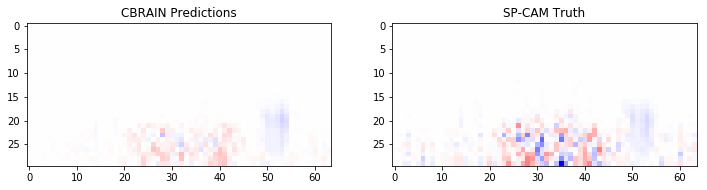

In [30]:
d.plot_double_lat_lev_slice('PHQ', 1, 0, vmin=-5e-7, vmax=5e-7, cmap='bwr')